In [6]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

from quantumScarFunctions import *
from quantumScarsPlotting import *

# constants
hbar = 1
wc = 1.247
args = {"A": 0.1, "omega": wc}

# annihilation and creation ops
a = qt.destroy(10)
a_dag = qt.create(10)

# hamiltonians
H0 = hbar * wc * a_dag * a
H1 = a + a_dag

# drive
# H = qt.QobjEvo([H0, [H1, coeff]], args=args)

# diagonalize the matrix
eigenvalues, eigenstates = H0.eigenstates()

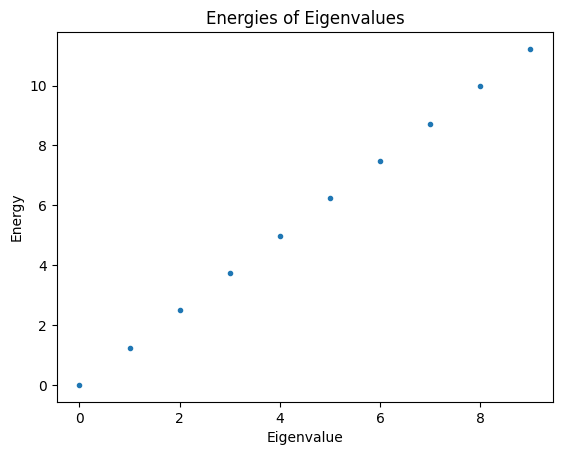

In [7]:
plotEigEnergies(H0)

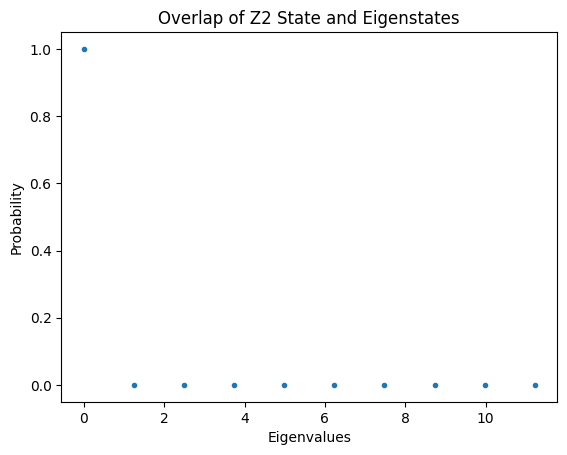

In [8]:
plotAmpEigenstatesZ2(H0, eigenstates[0])

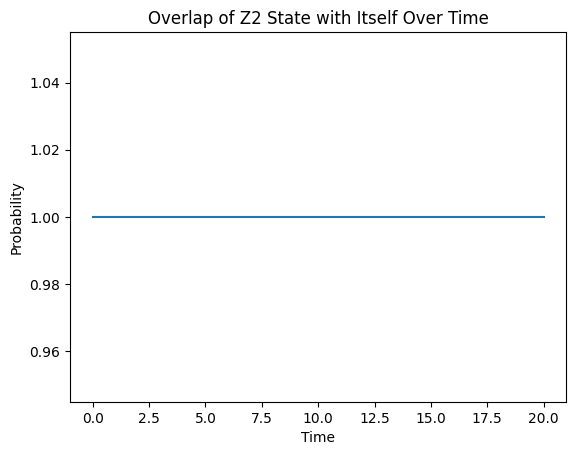

In [10]:
plotProbZ2Time(H0, eigenstates[0])

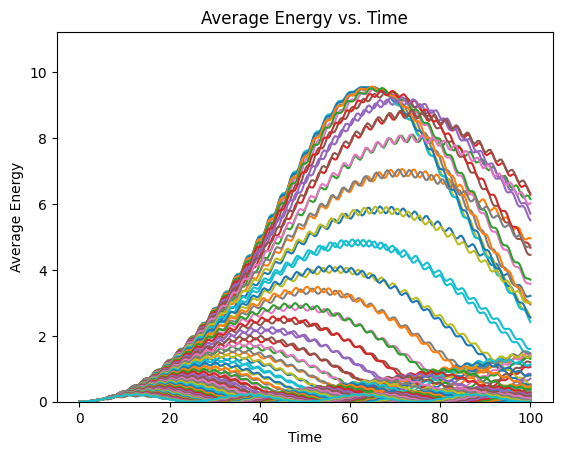

1.2575757575757576


In [ ]:
tlist_limited = np.linspace(0, 100, 250)
wlist_limited = np.linspace(1.0, 1.5, 100)
expectationVals_limited = {}
tempExpectation_limited = []

plt.figure()

for omega in wlist_limited:

    args = {"A": 0.1, "omega": omega}
    H = qt.QobjEvo([H0, [H1, coeff]], args=args) # create H using QobjEvo
    psi_t = qt.sesolve(H, eigenstates[0], tlist_limited) # evolve the H through time
    tempExpectation_limited = []

    for states in psi_t.states:

        val = states.dag() * H0 * states
        tempExpectation_limited.append(val.real)
    
    expectationVals_limited[omega] = tempExpectation_limited

for omega in wlist_limited:
    plt.plot(tlist_limited, expectationVals_limited[omega], label=f"$\\omega = {omega:.2f}$")

plt.xlabel("Time")
plt.ylabel("Average Energy")
plt.title("Average Energy vs. Time")
plt.ylim(eigenvalues[0], eigenvalues[-1])
# plt.legend()
plt.show()

# find wc - omega with the highest average energy peak
wc_potential = {}

for omega in wlist_limited:
    wc_potential[omega] = max(expectationVals_limited[omega])

best_omega = max(wc_potential, key=wc_potential.get)
wc_omega_pair = {float(best_omega): wc_potential[best_omega]}

print(best_omega)

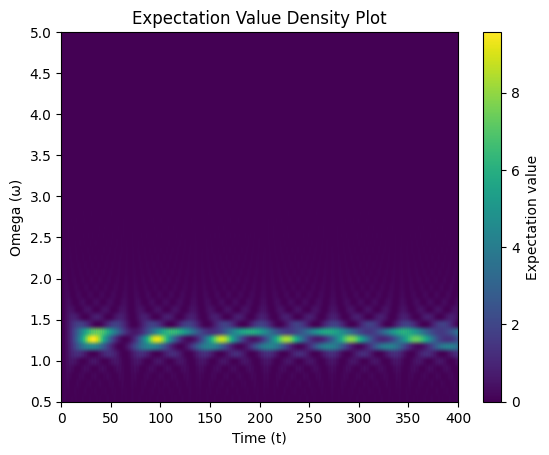

In [11]:
# plot the expectation values of the sparse matrix throughout time with different omega
tlist = np.linspace(0, 400, 500)
wlist = np.linspace(0.5, 5.0, 50)
expectationVals = []
tempExpectation = []

for omega in wlist:

    args = {"A": 0.2, "omega": omega}
    H = qt.QobjEvo([H0, [H1, coeff]], args=args) # create H using QobjEvo
    psi_t = qt.sesolve(H, eigenstates[0], tlist) # evolve the H through time
    tempExpectation = []

    for states in psi_t.states:

        val = states.dag() * H0 * states
        tempExpectation.append(val.real)

    expectationVals.append(tempExpectation)

plt.imshow(expectationVals,
           extent=[tlist.min(), tlist.max(), wlist.min(), wlist.max()],
           origin='lower',
           aspect='auto',
           cmap='viridis')
plt.colorbar(label="Expectation value")

plt.xlabel("Time (t)")
plt.ylabel("Omega (ω)")
plt.title("Expectation Value Density Plot")
plt.show()